In this notebook we detect clickbait headlines using a Logistic Regression model.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import warnings

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
warnings.simplefilter("ignore")

The dataset is on Kaggle https://www.kaggle.com/amananandrai/clickbait-dataset however you can downloaded the file directly from the link below.

In [4]:
df = pd.read_csv("https://raw.github.com/hminooei/DSbyHadi/master/data/clickbait_data.csv.zip")

In [5]:
df.shape
pd.set_option('display.max_colwidth', 100)
df.head(2)
df.tail(2)

(32000, 2)

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1


,headline,clickbait
31998,"Netanyahu Urges Pope Benedict, in Israel, to Denounce Iran",0
31999,Computer Makers Prepare to Stake Bigger Claim in Phones,0


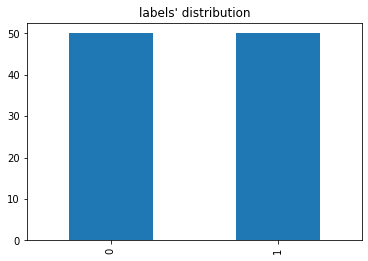

In [26]:
import matplotlib.pyplot as plt

percentages = round(df["clickbait"].value_counts()*100/len(df), 1)
percentages.plot(kind="bar", title="labels' distribution")

plt.show()

So the labels are equaly distributed.

In [7]:
def print_metrics(pipeline, text_train, label_train, text_val, label_val):
    train_preds = pipeline.predict(text_train)
    val_preds = pipeline.predict(text_val)
    
    print("train:")
    print(metrics.classification_report(label_train, train_preds, labels=[0, 1], digits=4))
    print(metrics.confusion_matrix(label_train, train_preds))
    print("validation:")
    print(metrics.classification_report(label_val, val_preds, labels=[0, 1], digits=4))
    print(metrics.confusion_matrix(label_val, val_preds))


def train_measure_model(text_train, label_train, text_val, label_val,
                        cv_binary, cv_analyzer, cv_ngram, cv_max_features,
                        cv_have_tfidf, cv_use_idf, cfr_penalty, cfr_C, stop_words=None, 
                        text_column_name="headline"):
    cv = CountVectorizer(binary=cv_binary, stop_words=stop_words,
                               analyzer=cv_analyzer,
                               ngram_range=cv_ngram[1:3],
                               max_features=cv_max_features)
    if cv_have_tfidf:
        pipeline = Pipeline(steps=[("vectorizer", cv), 
                                   ("tfidf", TfidfTransformer(use_idf=cv_use_idf)),
                                   ("classifier", LogisticRegression(penalty=cfr_penalty,
                                                                     C=cfr_C,
                                                                     random_state=9,
                                                                     max_iter=100,
                                                                     n_jobs=None))])
    else:
        pipeline = Pipeline(steps=[("vectorizer", cv), 
                                   ("classifier", LogisticRegression(penalty=cfr_penalty,
                                                                     C=cfr_C,
                                                                     random_state=9,
                                                                     max_iter=100,
                                                                     n_jobs=None))])

    pipeline.fit(text_train, label_train)
    print_metrics(pipeline, text_train, label_train, text_val, label_val)

    return pipeline

In [8]:
text_train_val, text_test, label_train_val, label_test = train_test_split(
    df["headline"], 
    df["clickbait"], 
    test_size=0.25, 
    stratify=df["clickbait"], 
    random_state=9)

# Split the train_val dataset to train and validation separete portions.
text_train, text_val, label_train, label_val = train_test_split(
    text_train_val,
    label_train_val, 
    test_size=0.2, 
    random_state=9)

In [9]:
text_train.shape
label_train.shape

text_val.shape
label_val.shape

text_test.shape
label_test.shape

(19200,)

(19200,)

(4800,)

(4800,)

(8000,)

(8000,)

In [10]:
%%time
cfr_pipeline = train_measure_model(text_train, label_train, text_val, label_val,
                                   cv_binary=False, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                   cv_max_features=50000, cv_have_tfidf=True, cv_use_idf=False, 
                                   cfr_penalty="l2", cfr_C=1.0, stop_words=None)

train:
              precision    recall  f1-score   support

           0     0.9631    0.9814    0.9722      9627
           1     0.9809    0.9622    0.9715      9573

    accuracy                         0.9718     19200
   macro avg     0.9720    0.9718    0.9718     19200
weighted avg     0.9720    0.9718    0.9718     19200

[[9448  179]
 [ 362 9211]]
validation:
              precision    recall  f1-score   support

           0     0.9501    0.9705    0.9602      2374
           1     0.9705    0.9501    0.9602      2426

    accuracy                         0.9602      4800
   macro avg     0.9603    0.9603    0.9602      4800
weighted avg     0.9604    0.9602    0.9602      4800

[[2304   70]
 [ 121 2305]]
CPU times: user 2.48 s, sys: 178 ms, total: 2.65 s
Wall time: 1.4 s


In [11]:
%%time
cfr_pipeline = train_measure_model(text_train, label_train, text_val, label_val,
                                   cv_binary=False, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                   cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=False, 
                                   cfr_penalty="l2", cfr_C=1.0, stop_words=None)

train:
              precision    recall  f1-score   support

           0     0.9615    0.9773    0.9693      9627
           1     0.9767    0.9606    0.9686      9573

    accuracy                         0.9690     19200
   macro avg     0.9691    0.9689    0.9690     19200
weighted avg     0.9691    0.9690    0.9690     19200

[[9408  219]
 [ 377 9196]]
validation:
              precision    recall  f1-score   support

           0     0.9527    0.9760    0.9642      2374
           1     0.9759    0.9526    0.9641      2426

    accuracy                         0.9642      4800
   macro avg     0.9643    0.9643    0.9642      4800
weighted avg     0.9644    0.9642    0.9642      4800

[[2317   57]
 [ 115 2311]]
CPU times: user 1.32 s, sys: 21.5 ms, total: 1.34 s
Wall time: 1.34 s


In [12]:
%%time
cfr_pipeline = train_measure_model(text_train, label_train, text_val, label_val,
                                   cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                   cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=False, 
                                   cfr_penalty="l2", cfr_C=1.0, stop_words=None)

train:
              precision    recall  f1-score   support

           0     0.9628    0.9780    0.9703      9627
           1     0.9775    0.9620    0.9697      9573

    accuracy                         0.9700     19200
   macro avg     0.9701    0.9700    0.9700     19200
weighted avg     0.9701    0.9700    0.9700     19200

[[9415  212]
 [ 364 9209]]
validation:
              precision    recall  f1-score   support

           0     0.9547    0.9760    0.9652      2374
           1     0.9760    0.9547    0.9652      2426

    accuracy                         0.9652      4800
   macro avg     0.9653    0.9653    0.9652      4800
weighted avg     0.9654    0.9652    0.9652      4800

[[2317   57]
 [ 110 2316]]
CPU times: user 1.35 s, sys: 17.1 ms, total: 1.37 s
Wall time: 1.37 s


In [13]:
%%time
cfr_pipeline = train_measure_model(text_train, label_train, text_val, label_val,
                                   cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                   cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                   cfr_penalty="l2", cfr_C=1.0, stop_words=None)

train:
              precision    recall  f1-score   support

           0     0.9712    0.9843    0.9777      9627
           1     0.9840    0.9706    0.9773      9573

    accuracy                         0.9775     19200
   macro avg     0.9776    0.9775    0.9775     19200
weighted avg     0.9776    0.9775    0.9775     19200

[[9476  151]
 [ 281 9292]]
validation:
              precision    recall  f1-score   support

           0     0.9632    0.9815    0.9723      2374
           1     0.9815    0.9633    0.9723      2426

    accuracy                         0.9723      4800
   macro avg     0.9724    0.9724    0.9723      4800
weighted avg     0.9725    0.9723    0.9723      4800

[[2330   44]
 [  89 2337]]
CPU times: user 1.32 s, sys: 13.6 ms, total: 1.33 s
Wall time: 1.33 s


In [14]:
def measure_model_on_test(model, text_test, label_test):
    test_preds = model.predict(text_test)
    test_metrics = metrics.classification_report(label_test, test_preds, labels=[0, 1], digits=4)
    print(test_metrics)
    print(metrics.confusion_matrix(label_test, test_preds))

In [15]:
measure_model_on_test(cfr_pipeline, text_test, label_test)

              precision    recall  f1-score   support

           0     0.9613    0.9690    0.9651      4000
           1     0.9688    0.9610    0.9649      4000

    accuracy                         0.9650      8000
   macro avg     0.9650    0.9650    0.9650      8000
weighted avg     0.9650    0.9650    0.9650      8000

[[3876  124]
 [ 156 3844]]


Saving the best model so far on disk.

In [16]:
import pickle

model_name = 'clickbait-model-sm.pkl'
cfr_pipeline.named_steps.vectorizer.stop_words_ = None # to reduce the pickle size (from 5mb to 500kb)
pickle.dump(cfr_pipeline, open(model_name, 'wb'), protocol=2)

Find mislabeled samples by the model.

In [17]:
def get_incorrect_predictions(trained_model, all_data, text_df, label_series):
    col_name = text_df.columns.values.tolist()[0]
    preds = trained_model.predict(text_df[col_name])
    incorrectly_predicted = text_df.loc[label_series != preds]
    incorrectly_predicted.shape
    res = incorrectly_predicted.merge(all_data, on=col_name, suffixes=("_left", "_right"))
    return res

In [18]:
to_be_added = get_incorrect_predictions(cfr_pipeline, df, text_train.to_frame(name="headline"), label_train)

In [19]:
to_be_added.head(3)
to_be_added.shape

,headline,clickbait
0,Big Batch Breakfast Bakes,1
1,6 Little Victories,1
2,"Meet Stoner Sloth, The NSW Government's New Anti-Pot Mascot",1


(432, 2)

Prepare and add the mislabeled samples back to the training set (**Manual Boosting**)

In [20]:
extra_text_train = to_be_added["headline"]
extra_label_train = to_be_added["clickbait"]

extra_label_train = np.array(extra_label_train)

In [21]:
boosted_text_train = pd.concat([text_train, extra_text_train])
boosted_label_train = np.concatenate([label_train, extra_label_train], axis=0)

cfr_pipeline_1x = train_measure_model(boosted_text_train, boosted_label_train, 
                                      text_val, label_val,
                                      cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                      cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                      cfr_penalty="l2", cfr_C=1.0, stop_words=None)

print("test:")
measure_model_on_test(cfr_pipeline_1x, text_test, label_test)

train:
              precision    recall  f1-score   support

           0     0.9678    0.9778    0.9728      9778
           1     0.9778    0.9677    0.9727      9854

    accuracy                         0.9727     19632
   macro avg     0.9728    0.9728    0.9727     19632
weighted avg     0.9728    0.9727    0.9727     19632

[[9561  217]
 [ 318 9536]]
validation:
              precision    recall  f1-score   support

           0     0.9652    0.9819    0.9735      2374
           1     0.9820    0.9654    0.9736      2426

    accuracy                         0.9735      4800
   macro avg     0.9736    0.9736    0.9735      4800
weighted avg     0.9737    0.9735    0.9735      4800

[[2331   43]
 [  84 2342]]
test:
              precision    recall  f1-score   support

           0     0.9648    0.9675    0.9662      4000
           1     0.9674    0.9647    0.9661      4000

    accuracy                         0.9661      8000
   macro avg     0.9661    0.9661    0.9661      

Boost the training set twice!

In [22]:
boosted_text_train_2x = pd.concat([text_train]+[extra_text_train]*2)
boosted_label_train_2x = np.concatenate([label_train]+[extra_label_train]*2, axis=0)

cfr_pipeline_2x = train_measure_model(boosted_text_train_2x, boosted_label_train_2x, 
                                      text_val, label_val,
                                      cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                      cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                      cfr_penalty="l2", cfr_C=1.0, stop_words=None)

print("test:")
measure_model_on_test(cfr_pipeline_2x, text_test, label_test)

train:
              precision    recall  f1-score   support

           0     0.9759    0.9799    0.9779      9929
           1     0.9802    0.9763    0.9783     10135

    accuracy                         0.9781     20064
   macro avg     0.9781    0.9781    0.9781     20064
weighted avg     0.9781    0.9781    0.9781     20064

[[9729  200]
 [ 240 9895]]
validation:
              precision    recall  f1-score   support

           0     0.9656    0.9806    0.9730      2374
           1     0.9807    0.9658    0.9732      2426

    accuracy                         0.9731      4800
   macro avg     0.9732    0.9732    0.9731      4800
weighted avg     0.9732    0.9731    0.9731      4800

[[2328   46]
 [  83 2343]]
test:
              precision    recall  f1-score   support

           0     0.9672    0.9655    0.9663      4000
           1     0.9656    0.9673    0.9664      4000

    accuracy                         0.9664      8000
   macro avg     0.9664    0.9664    0.9664      

So far, the 2x manual boosted model has the best metrics. 

Below, you can see the effect of overfitting in the 5x version!!

In [23]:
boosted_text_train_3x = pd.concat([text_train]+[extra_text_train]*3)
boosted_label_train_3x = np.concatenate([label_train]+[extra_label_train]*3, axis=0)

cfr_pipeline_3x = train_measure_model(boosted_text_train_3x, boosted_label_train_3x, 
                                      text_val, label_val,
                                      cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                      cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                      cfr_penalty="l2", cfr_C=1.0, stop_words=None)

print("test:")
measure_model_on_test(cfr_pipeline_3x, text_test, label_test)

train:
              precision    recall  f1-score   support

           0     0.9802    0.9812    0.9807     10080
           1     0.9818    0.9808    0.9813     10416

    accuracy                         0.9810     20496
   macro avg     0.9810    0.9810    0.9810     20496
weighted avg     0.9810    0.9810    0.9810     20496

[[ 9891   189]
 [  200 10216]]
validation:
              precision    recall  f1-score   support

           0     0.9659    0.9777    0.9717      2374
           1     0.9779    0.9662    0.9720      2426

    accuracy                         0.9719      4800
   macro avg     0.9719    0.9719    0.9719      4800
weighted avg     0.9719    0.9719    0.9719      4800

[[2321   53]
 [  82 2344]]
test:
              precision    recall  f1-score   support

           0     0.9681    0.9640    0.9661      4000
           1     0.9642    0.9683    0.9662      4000

    accuracy                         0.9661      8000
   macro avg     0.9661    0.9661    0.9661  

In [24]:
boosted_text_train_4x = pd.concat([text_train]+[extra_text_train]*4)
boosted_label_train_4x = np.concatenate([label_train]+[extra_label_train]*4, axis=0)

cfr_pipeline_4x = train_measure_model(boosted_text_train_4x, boosted_label_train_4x, 
                                      text_val, label_val,
                                      cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                      cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                      cfr_penalty="l2", cfr_C=1.0, stop_words=None)

print("test:")
measure_model_on_test(cfr_pipeline_4x, text_test, label_test)

train:
              precision    recall  f1-score   support

           0     0.9852    0.9849    0.9851     10231
           1     0.9856    0.9859    0.9857     10697

    accuracy                         0.9854     20928
   macro avg     0.9854    0.9854    0.9854     20928
weighted avg     0.9854    0.9854    0.9854     20928

[[10077   154]
 [  151 10546]]
validation:
              precision    recall  f1-score   support

           0     0.9662    0.9764    0.9713      2374
           1     0.9767    0.9666    0.9716      2426

    accuracy                         0.9715      4800
   macro avg     0.9715    0.9715    0.9715      4800
weighted avg     0.9715    0.9715    0.9715      4800

[[2318   56]
 [  81 2345]]
test:
              precision    recall  f1-score   support

           0     0.9678    0.9633    0.9655      4000
           1     0.9634    0.9680    0.9657      4000

    accuracy                         0.9656      8000
   macro avg     0.9656    0.9656    0.9656  

In [25]:
boosted_text_train_5x = pd.concat([text_train]+[extra_text_train]*5)
boosted_label_train_5x = np.concatenate([label_train]+[extra_label_train]*5, axis=0)

cfr_pipeline_5x = train_measure_model(boosted_text_train_5x, boosted_label_train_5x, 
                                      text_val, label_val,
                                      cv_binary=True, cv_analyzer="word", cv_ngram=("w", 1, 3), 
                                      cv_max_features=5000, cv_have_tfidf=True, cv_use_idf=True, 
                                      cfr_penalty="l2", cfr_C=1.0, stop_words=None)

print("test:")
measure_model_on_test(cfr_pipeline_5x, text_test, label_test)

train:
              precision    recall  f1-score   support

           0     0.9892    0.9867    0.9879     10382
           1     0.9875    0.9898    0.9886     10978

    accuracy                         0.9883     21360
   macro avg     0.9883    0.9883    0.9883     21360
weighted avg     0.9883    0.9883    0.9883     21360

[[10244   138]
 [  112 10866]]
validation:
              precision    recall  f1-score   support

           0     0.9658    0.9768    0.9713      2374
           1     0.9771    0.9662    0.9716      2426

    accuracy                         0.9715      4800
   macro avg     0.9715    0.9715    0.9715      4800
weighted avg     0.9715    0.9715    0.9715      4800

[[2319   55]
 [  82 2344]]
test:
              precision    recall  f1-score   support

           0     0.9698    0.9635    0.9666      4000
           1     0.9637    0.9700    0.9669      4000

    accuracy                         0.9667      8000
   macro avg     0.9668    0.9667    0.9667  